This is my first ever completed Charting Tool project. I started learning using LLMs to program from early Febuary 2025 and finished it at late April.

##   This is what normal chart looks like

![img](https://github.com/algorembrant/Pinescript.TradingView-Indicators.and.Strategies/blob/main/Images/Screenshot%202025-11-15%20182205.png?raw=true)

## Modifyig it using piescript code, Indicator (1/2)

In [ ]:
//@version=6
//indicator("v5", overlay = true, max_labels_count = 300, max_lines_count = 300, max_boxes_count = 300, max_bars_back = 300)
indicator("Sunstoic", "v6 Sunstoic", true, max_bars_back = 5000, max_boxes_count = 500, max_lines_count = 500, max_labels_count = 500)


//candle logic
// === Inputs ===
bCol = input.color(#008080, title="Bull Border")
rCol = input.color(#e20000, title="Bear Border")
bgB = input.color(color.new(#008080, 20), title="Bull Body")
bgR = input.color(color.new(#FF0000, 20), title="Bear Body")


    // === Input your time zone (Manila = GMT+8) 
timeSessionStart = timestamp("GMT+8", year, month, dayofmonth, 6, 0)  // Start of day
isNewDay = ta.change(time("D"))  // Detect new day

// Track the current day's developing close on each bar
var float devClose = na
if bool(isNewDay)
    devClose := close  // reset on new day
else
    devClose := close  // update each bar


// === Default Daily Candle (6:00 AM) ===
dO = request.security(syminfo.tickerid, "D", open)
dH = request.security(syminfo.tickerid, "D", high)
dL = request.security(syminfo.tickerid, "D", low)
dC = request.security(syminfo.tickerid, "D", close)


// Calculate daily high and low using 'day' timeframe
var float dailyHigh = na
var float dailyLow = na
newDay = ta.change(time("D"))


// On new day, reset high/low
if bool(newDay)
    dailyHigh := close
    dailyLow := open
else
    dailyHigh := math.max(dailyHigh, close)
    dailyLow := math.min(dailyLow, open)


// Midpoint of the daily candle 
midPrice = (dailyHigh + dailyLow) / 2


dBull = dC >= dO
dCol = dBull ? bCol : rCol
dBg = dBull ? bgB : bgR


// Offset for visuals
ofs = 10
bw = 2
rIdx = bar_index + ofs + bw / 2
lIdx = bar_index + ofs - bw / 2
xMid = int(bar_index + ofs)


// Body of daily candle box
var box dBx = na
box.delete(dBx)
tB = math.max(dO, devClose) //y=dC
bB = math.min(dO, devClose)
dBx := box.new(left=int(lIdx), right=int(rIdx), top=tB, bottom=bB, border_color=dCol, bgcolor=dBg)


// Wicks for daily candle
var line dW1 = na
var line dW2 = na
line.delete(dW1)
line.delete(dW2)
dW1 := line.new(x1=xMid, y1=dH, x2=xMid, y2=tB, color=dCol)
dW2 := line.new(x1=xMid, y1=bB, x2=xMid, y2=dL, color=dCol)



// Labels for daily candle
var label lblO = na
var label lblH = na
var label lblL = na
var label lblC = na
label.delete(lblO)
label.delete(lblH)
label.delete(lblL)
label.delete(lblC)


lblStyle = label.style_label_right
lblSize = size.tiny
lblOfs = -2

lblO := label.new(x=xMid + lblOfs, y=dO, text="6O " + str.tostring(dO, "#"), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblH := label.new(x=xMid + lblOfs, y=dH, text="6H " + str.tostring(dH, "#"), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblL := label.new(x=xMid + lblOfs, y=dL, text="6L " + str.tostring(dL, "#"), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblC := label.new(x=xMid + lblOfs, y=devClose, text="6C " + str.tostring(dC, "#"), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)

// === Custom Daily Candle (8:00 AM Manila) ===
sh = 24
sm = 0
stt = timestamp("UTC", year, month, dayofmonth, sh, sm)


var float cO = na
var float cH = na
var float cL = na
var float cC = na


if (time == stt)
    cO := open
    cH := high
    cL := low
    cC := close


if (not na(cO))
    cH := math.max(cH, high)
    cL := math.min(cL, low)
    cC := close


cBull = cC >= cO
cCol = cBull ? bCol : rCol
cBg = cBull ? bgB : bgR


cOfs = 12
cbw = 2
crIdx = bar_index + cOfs + cbw / 2
clIdx = bar_index + cOfs - cbw / 2
cX = int(bar_index + cOfs)


// Custom body box
var box cBx = na
box.delete(cBx)
ctB = math.max(cO, devClose) //y=dC
cbB = math.min(cO, devClose)
cBx := box.new(left=int(clIdx), right=int(crIdx), top=ctB, bottom=cbB, border_color=cCol, bgcolor=cBg)


// Custom wicks
var line cW1 = na
var line cW2 = na
line.delete(cW1)
line.delete(cW2)
cW1 := line.new(x1=cX, y1=cH, x2=cX, y2=ctB, color=cCol)
cW2 := line.new(x1=cX, y1=cbB, x2=cX, y2=cL, color=cCol)


// Custom labels
var label clO = na
var label clH = na
var label clL = na
var label clC = na
label.delete(clO)
label.delete(clH)
label.delete(clL)
label.delete(clC)


clStyle = label.style_label_left
clSize = size.tiny
clOfs = 2


clO := label.new(x=cX + clOfs, y=cO, text="8O " + str.tostring(cO, "#"), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clH := label.new(x=cX + clOfs, y=cH, text="8H " + str.tostring(cH, "#"), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clL := label.new(x=cX + clOfs, y=cL, text="8L " + str.tostring(cL, "#"), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clC := label.new(x=cX + clOfs, y=devClose, text="8C " + str.tostring(dC, "#"), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)

// === High and Low Lines (using bar_index for x coords) ===
// Track bar_index of high and low bars within current day
var int highBarIndex = na
var int lowBarIndex = na
var float dayHigh = na
var float dayLow = na


startOfDay = timestamp(year, month, dayofmonth, 0, 0)
t6amManila = timestamp("Asia/Manila", year, month, dayofmonth, 6, 0)


issNewDay = ta.change(time("D"))


if (time >= startOfDay)
    if na(dayHigh) or high > dayHigh
        dayHigh := high
        highBarIndex := bar_index
    if na(dayLow) or low < dayLow
        dayLow := low
        lowBarIndex := bar_index


if bool(issNewDay)
    dayHigh := na
    dayLow := na
    highBarIndex := na
    lowBarIndex := na


// Draw high line from high bar index to current xMid
var line highLine = na
if not na(dayHigh) and not na(highBarIndex)
    if na(highLine)
        highLine := line.new(x1=highBarIndex, y1=dayHigh, x2=xMid, y2=dayHigh, color=dCol, width=2, style = line.style_solid)
    else
        line.set_xy1(highLine, highBarIndex, dayHigh)
        line.set_xy2(highLine, xMid, dayHigh)


// Draw low line from low bar index to current xMid
var line lowLine = na
if not na(dayLow) and not na(lowBarIndex)
    if na(lowLine)
        lowLine := line.new(x1=lowBarIndex, y1=dayLow, x2=xMid, y2=dayLow, color=dCol, width=2, style = line.style_solid)
    else
        line.set_xy1(lowLine, lowBarIndex, dayLow)
        line.set_xy2(lowLine, xMid, dayLow)





// --- 6:00 AM Asia/Manila horizontal line ---
// Manila 6:00 AM timestamp today
manila_6am = timestamp("GMT+8", year, month, dayofmonth, 30, 0)


// Detect bar where time crosses 6:00 AM Manila
isStartBar6am = (time >= manila_6am) and (time[1] < manila_6am)


// Store 6:00 AM bar open price and index
var float price6am = na
var int bar6am_index = na


if isStartBar6am
    price6am := open
    bar6am_index := bar_index


// Draw horizontal line from 6AM bar index to xMid at price6am
var line hLine6am = na


if not na(price6am) and not na(bar6am_index)
    line.delete(hLine6am)
    hLine6am := line.new(x1=bar6am_index, y1=price6am, x2=xMid, y2=price6am, color=color.new(#000000, 0), width=1, style=line.style_solid)


// --- 8:00 AM Asia/Manila horizontal line ---
// Detect bar where time crosses 8:00 AM Manila
isStartBar8am = (time >= stt) and (time[1] < stt)


// Store 8:00 AM bar open price and index
var float price8am = na
var int bar8am_index = na


if isStartBar8am
    price8am := open
    bar8am_index := bar_index


// Draw horizontal line from 8AM bar index to cX at price8am
var line hLine8am = na
var line hhLine8am = na


if not na(price8am) and not na(bar8am_index)
    line.delete(hLine8am)
    hLine8am := line.new(x1=bar8am_index, y1=price8am, x2=cX, y2=price8am, color=color.new(#000000, 0), width=1, style=line.style_solid)



// Draw horizontal line that updates000000000000000000000000
var line devCloseLine = na
var line ddevCloseLine = na
if bar_index > 0
    if na(devCloseLine)
        devCloseLine := line.new(x1=bar_index, y1=devClose , x2=xMid , y2=devClose, style = line.style_solid, color=color.new(#ecc900, 0), width=1)
    else
        line.set_xy1(devCloseLine, bar_index, devClose)
        line.set_xy2(devCloseLine, bar_index + 13, devClose)
    if na(ddevCloseLine) 
        //ddevCloseLine := line.new(x1=xMid, y1=devClose, x2=xMid, y2=devClose, extend=extend.right, color=dCol, width=2)
        ddevCloseLine := line.new(x1=xMid, y1=devClose, x2=xMid , y2=devClose, style = line.style_dotted, extend=extend.right, color=color.black, width=1)
    else
        line.set_xy1(ddevCloseLine, bar_index + 19,  devClose)
        line.set_xy2(ddevCloseLine, bar_index + 20, devClose)



//zone logic
// Disable visuals if timeframe is higher than 1 hour
isValidTF = timeframe.isminutes and timeframe.multiplier <= 60


// Current time components
currentTime = timestamp(year, month, dayofmonth, hour, minute)

// Define 12PM to 12AM session
start12pm = timestamp(year, month, dayofmonth, 12, 0)
end12am = timestamp(year, month, dayofmonth, 23, 59)
in12pmTo12am = currentTime >= start12pm and currentTime <= end12am

// Define 8AM to 8PM session
start8am = timestamp(year, month, dayofmonth, 8, 0)
end8pm = timestamp(year, month, dayofmonth, 20, 0)
in8amTo8pm = currentTime >= start8am and currentTime <= end8pm

// Define 6PM to 8PM session
start6pm = timestamp(year, month, dayofmonth, 6, 0)
eend8pm = timestamp(year, month, dayofmonth, 8, 0)
in6pmTo8pm = currentTime >= start6pm and currentTime <= eend8pm

start6am = timestamp(year, month, dayofmonth, 18, 0)
eend8am = timestamp(year, month, dayofmonth, 20, 0)
in6amTo8am = currentTime >= start6am and currentTime <= eend8am

// Apply background highlights
bgcolor(isValidTF and in12pmTo12am ? color.new(color.black, 99) : na)
bgcolor(isValidTF and in8amTo8pm ? color.new(color.black, 99) : na)
bgcolor(isValidTF and in6pmTo8pm ? color.new(color.black, 97) : na)
bgcolor(isValidTF and in6amTo8am ? color.new(color.black, 95) : na)

// Get the current day of the week and the current time
isMonday = dayofweek == dayofweek.sunday
ccurrentTime = timestamp(year, month, dayofmonth, hour, minute)

// Define the time range for 6:00 AM to 8:00 AM
startTime = timestamp(year, month, dayofmonth, 18, 6) // 6:00 AM
endTime = timestamp(year, month, dayofmonth, 20, 0) // 8:00 AM

// Check if it's Monday and the current time is within the range of 6:00 AM to 8:00 AM
isInTimeRange = isMonday and ccurrentTime >= startTime and ccurrentTime <= endTime

// Highlight the area with a background color
bgcolor(isValidTF and isInTimeRange ? color.new(color.blue, 90) : na)

// Vertical lines logic
// Only show vertical lines if timeframe is intraday and valid
showLines = timeframe.isintraday and isValidTF

// Convert current bar time to Asia/Manila timezone
t = time(timeframe.period, 'Asia/Manila')

// Target hours excluding 0, 12, 20
var array<int> targetHours = array.from(3, 6, 8, 15, 24) // 24 means midnight (0h)

// Special hours separated
specialHour20 = 20
specialHour0 = 0 // midnight
specialHour12 = 12 // noon

// Function to check if current bar time matches any target hour exactly at minute zero
isTargetTime() =>
    h = hour(t)
    m = minute(t)
    match = false
    for i = 0 to array.size(targetHours) - 1 by 1
        if (h == array.get(targetHours, i) or h == 0 and array.get(targetHours, i) == 24) and m == 0
            match := true
            match
    match

// Check if current time matches special hour 20 at minute zero
isSpecialTime20() =>
    h = hour(t)
    m = minute(t)
    h == specialHour20 and m == 0

// Check if current time matches special hour 0 at minute zero
isSpecialTime0() =>
    h = hour(t)
    m = minute(t)
    h == specialHour0 and m == 0

// Check if current time matches special hour 12 at minute zero
isSpecialTime12() =>
    h = hour(t)
    m = minute(t)
    h == specialHour12 and m == 0

// Detect new day (day break)
nnewDay = ta.change(time('D'))

// Only draw lines if timeframe is intraday and valid
if showLines
    // Draw vertical line at day break (green, width 1)
    if bool(nnewDay)
        line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color = color.rgb(76, 175, 79, 90), width = 1, extend = extend.both)

    // Draw vertical line at target times (blue, width 1)
    if isTargetTime()
        line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color = color.rgb(33, 149, 243, 95), width = 1, extend = extend.both)

    // Draw vertical line at special hour 20 (teal, width 1)
    if isSpecialTime20()
        line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color = color.new(color.teal, 50), width = 1, extend = extend.both)

    // Draw vertical line at special hour 0 (midnight) - orange, dotted
    if isSpecialTime0()
        var line midnightLine = na
        midnightLine := line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color = color.rgb(255, 153, 0, 50), width = 1, extend = extend.both)
        line.set_style(midnightLine, line.style_dotted)

    // Draw vertical line at special hour 12 (noon) - red, dotted
    if isSpecialTime12()
        var line noonLine = na
        noonLine := line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color = color.rgb(255, 82, 82, 50), width = 1, extend = extend.both)
        line.set_style(noonLine, line.style_dotted)

//hourly logic
// === UTILITY FUNCTION ===
f_show(tf) =>
    timeframe.period != tf

// === HOURLY ===
hH = request.security(syminfo.tickerid, '60', high, lookahead = barmerge.lookahead_on)
hL = request.security(syminfo.tickerid, '60', low, lookahead = barmerge.lookahead_on)
hIdx = request.security(syminfo.tickerid, '60', bar_index, lookahead = barmerge.lookahead_on)

var int hPrev = na
var float hHi = na
var int hHiBar = na
var line hHiLine = na
var bool hHiOn = false
var float hLo = na
var int hLoBar = na
var line hLoLine = na
var bool hLoOn = false

if hIdx != hPrev
    hPrev := hIdx
    hHi := na
    hHiBar := na
    line.delete(hHiLine)
    hHiLine := na
    hHiOn := false
    hLo := na
    hLoBar := na
    line.delete(hLoLine)
    hLoLine := na
    hLoOn := false
    hLoOn

if hHiOn and not na(hHiLine)
    bMin = math.min(open, close)
    bMax = math.max(open, close)
    if hHi <= bMax and hHi >= bMin
        line.set_x2(hHiLine, bar_index)
        line.set_y2(hHiLine, hHi)
        hHiOn := false
        hHiOn
    else
        line.set_x2(hHiLine, bar_index)
        line.set_y2(hHiLine, hHi)

if hLoOn and not na(hLoLine)
    bMin = math.min(open, close)
    bMax = math.max(open, close)
    if hLo <= bMax and hLo >= bMin
        line.set_x2(hLoLine, bar_index)
        line.set_y2(hLoLine, hLo)
        hLoOn := false
        hLoOn
    else
        line.set_x2(hLoLine, bar_index)
        line.set_y2(hLoLine, hLo)


// === D/W/M High-Low Steplines ===
ddH = request.security(syminfo.tickerid, 'D', high, lookahead = barmerge.lookahead_on)
ddL = request.security(syminfo.tickerid, 'D', low, lookahead = barmerge.lookahead_on)
wH = request.security(syminfo.tickerid, 'W', high, lookahead = barmerge.lookahead_on)
wL = request.security(syminfo.tickerid, 'W', low, lookahead = barmerge.lookahead_on)
mH = request.security(syminfo.tickerid, 'M', high, lookahead = barmerge.lookahead_on)
mL = request.security(syminfo.tickerid, 'M', low, lookahead = barmerge.lookahead_on)

plot(f_show('60') ? hH : na, title = 'H High', color = color.new(color.black, 90), style = plot.style_stepline, linewidth = 2)
plot(f_show('60') ? hL : na, title = 'H Low', color = color.new(color.black, 90), style = plot.style_stepline, linewidth = 2)
plot(f_show('D') ? ddH : na, title = 'D High', color = color.new(color.green, 50), style = plot.style_stepline)
plot(f_show('D') ? ddL : na, title = 'D Low', color = color.new(color.green, 70), style = plot.style_stepline)
plot(f_show('W') ? wH : na, title = 'W High', color = color.new(color.blue, 90), style = plot.style_stepline, linewidth = 2)
plot(f_show('W') ? wL : na, title = 'W Low', color = color.new(color.blue, 90), style = plot.style_stepline, linewidth = 2)
plot(f_show('M') ? mH : na, title = 'M High', color = color.new(color.purple, 90), style = plot.style_stepline, linewidth = 3)
plot(f_show('M') ? mL : na, title = 'M Low', color = color.new(color.purple, 90), style = plot.style_stepline, linewidth = 3)


//vwap logic
// VWAP calculation from 1-minute data
f_vwap_calc() =>
    var float cumPV = 0.0
    var float cumVol = 0.0
    var float cumPV_buy = 0.0
    var float cumVol_buy = 0.0
    var float cumPV_sell = 0.0
    var float cumVol_sell = 0.0

    // Reset on new day
    if bool(ta.change(time('D')))
        cumPV := 0.0
        cumVol := 0.0
        cumPV_buy := 0.0
        cumVol_buy := 0.0
        cumPV_sell := 0.0
        cumVol_sell := 0.0
        cumVol_sell

    buyVol = close > open ? volume : 0.0
    sellVol = close < open ? volume : 0.0

    cumPV := cumPV + close * volume
    cumVol := cumVol + volume

    cumPV_buy := cumPV_buy + close * buyVol
    cumVol_buy := cumVol_buy + buyVol

    cumPV_sell := cumPV_sell + close * sellVol
    cumVol_sell := cumVol_sell + sellVol

    vwap = cumVol != 0 ? cumPV / cumVol : na
    buyVWAP = cumVol_buy != 0 ? cumPV_buy / cumVol_buy : na
    sellVWAP = cumVol_sell != 0 ? cumPV_sell / cumVol_sell : na

    [vwap, buyVWAP, sellVWAP]

// Pull 1-minute VWAP values
[vwap_1m, buyVWAP_1m, sellVWAP_1m] = request.security(syminfo.tickerid, '1', f_vwap_calc())

// Only show on intraday charts
showVWAP = not timeframe.isdaily and not timeframe.isweekly and not timeframe.ismonthly
  
// Plot VWAPs with conditional display
plot_vwap = plot(showVWAP ? vwap_1m : na, color = color.rgb(238, 218, 90), linewidth = 1, title = 'VWAP (1m)')
//plot_buy_vwap = plot(showVWAP ? buyVWAP_1m : na, color = color.rgb(0, 137, 123, 80), linewidth = 1, title = 'Buy Delta VWAP (1m)')
//plot_sell_vwap = plot(showVWAP ? sellVWAP_1m : na, color = color.rgb(255, 82, 82, 80), linewidth = 1, title = 'Sell Delta VWAP (1m)')

// Fill areas
//fill(plot_vwap, plot_buy_vwap, color = showVWAP ? color.new(color.teal, 95) : na, title = 'Buy VWAP Fill')
//fill(plot_vwap, plot_sell_vwap, color = showVWAP ? color.new(color.red, 95) : na, title = 'Sell VWAP Fill')

//table logic
// === Function to get OHLC of specified candle ===
get_prev_ohlc(tf, shift) =>
    o = request.security(syminfo.tickerid, tf, open[shift])
    h = request.security(syminfo.tickerid, tf, high[shift])
    l = request.security(syminfo.tickerid, tf, low[shift])
    c = request.security(syminfo.tickerid, tf, close[shift])
    [o, h, l, c]

// === Function to calculate ranges and colors ===
get_data(tf, shift) =>
    [o, h, l, c] = get_prev_ohlc(tf, shift)
    full_range = h - l
    oc_range = math.abs(c - o)
    hl_range = h - l
    is_bull = c > o
    bg_color = is_bull ? color.new(color.teal, 90) : color.new(color.red, 90)
    [full_range, oc_range, hl_range, bg_color]

// === Daily Candle Data ===
[d1_fr, d1_oc, d1_hl, d1_bg] = get_data("D", 1)
[d2_fr, d2_oc, d2_hl, d2_bg] = get_data("D", 2)

// === Weekly Candle Data ===
[w0_fr, w0_oc, w0_hl, w0_bg] = get_data("W", 0) // Developing Week
[w1_fr, w1_oc, w1_hl, w1_bg] = get_data("W", 1)
[w2_fr, w2_oc, w2_hl, w2_bg] = get_data("W", 2)


// Daily candle (6:00 AM)
sixambgcolor = dO < dC ?  color.rgb(0, 137, 123, 90) : color.rgb(255, 82, 82, 90)

// Custom candle (8:00 AM Manila)
eightambgcolor = cO < cC ?  color.rgb(0, 137, 123, 90) : color.rgb(255, 82, 82, 90) 

// Adjust UTC time to Manila (UTC+8) qewrqwerwerwerwerwerew
manilaTime = time + 8 * 60 * 60 * 1000  // Shift by 8 hours in milliseconds

// Extract date components from Manila time
manilaYear  = year(manilaTime)
manilaMonth = month(manilaTime)
manilaDay   = dayofmonth(manilaTime)

// Format date as "DD/MM/YYYY"
formattedDate = str.tostring(manilaDay, "00") + "/" + str.tostring(manilaMonth, "00") + "/" + str.tostring(manilaYear)

// Track day changes in Manila time
var int prevManilaDay = na
newManilaDay = manilaDay != prevManilaDay

// Update stored day
if newManilaDay
    prevManilaDay := manilaDay
//qweqweqweqweqeqweqweqwewqeqwewqeqe

// UTC/UTC+8 Time
var label utcLbl = na
var label utc8Lbl = na
label.delete(utcLbl)
label.delete(utc8Lbl)

//utcStr = "UTC: " + str.tostring(hour, "00") + ":" + str.tostring(minute, "00")
uutcStr = str.tostring(hour, "00") + ":" + str.tostring(minute, "00") + " 𝘜𝘛𝘊+8"
utc8H = (hour + 12) % 24
//utc8Str = "UTC: " + str.tostring(utc8H, "00") + ":" + str.tostring(minute, "00")
uutc8Str =str.tostring(utc8H, "00") + ":" + str.tostring(minute, "00") + " 𝘜𝘛𝘊+8"

// TF Label
var label tfLbl = na
label.delete(tfLbl)
var label tfLbl2 = na
label.delete(tfLbl2)

tfS = ""
if (str.length(timeframe.period) > 1 and str.substring(timeframe.period, str.length(timeframe.period)-1, str.length(timeframe.period)) == "m")
    tfS := "m"
else if (str.length(timeframe.period) > 1 and str.substring(timeframe.period, str.length(timeframe.period)-1, str.length(timeframe.period)) == "h")
    tfS := "h"
tfP = str.replace(timeframe.period, tfS, "")
tfText = tfP + tfS + "m 𝘪𝘯𝘵𝘰 1D"

// Range Labels
dHL = math.abs(dH - dL)
dOC = math.abs(dO - dC)
cHL = math.abs(cH - cL)
cOC = math.abs(cO - cC)

// === Create and update table ===
var table tt = table.new(position.top_right, 80, 80, border_width=1)

if bar_index == 1
    table.cell(tt, 0, 0, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny, bgcolor=color.rgb(120, 123, 134, 100))
    table.cell(tt, 1, 0, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny,bgcolor=color.rgb(120, 123, 134, 100))

    table.cell(tt, 0, 1, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny, bgcolor=color.rgb(120, 123, 134, 100))
    table.cell(tt, 1, 1, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny,bgcolor=color.rgb(120, 123, 134, 100))
 
// === Daily Rows ===
table.cell(tt, 1, 2, "𝑺𝒑𝒆𝒄𝒊𝒇𝒊𝒄𝒂𝒕𝒊𝒐𝒏", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(tt, 0, 3, "Date", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 3, formattedDate, text_size = size.tiny, bgcolor = color.rgb(120, 123, 134, 90), text_color = color.rgb(255, 255, 255, 30))
 
table.cell(tt, 0, 4, "Time", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 4, text = uutc8Str, text_size = size.tiny, bgcolor = color.rgb(120, 123, 134, 90), text_color = color.rgb(255, 255, 255, 30))
 
table.cell(tt, 0, 5, "Time", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 5, text=uutcStr, text_size = size.tiny, bgcolor = color.rgb(120, 123, 134, 90), text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 0, 6, "Type", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 6, text=tfText, text_size = size.tiny, bgcolor = color.rgb(120, 123, 134, 90), text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 1, 7, "𝑯𝒊𝒈𝒉𝒆𝒓 𝑻𝑭", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(tt, 0, 8, "6:00\nяαηgє", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 8, "HL | $" + str.tostring(dHL, "#") + "\nOC | $" + str.tostring(dOC, "#"), text_size = size.tiny, bgcolor = sixambgcolor, text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 0, 9, "8:00\nяαηgє", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 9, "HL | $" + str.tostring(cHL, "#") + "\nOC | $" + str.tostring(cOC, "#"), text_size = size.tiny, bgcolor = eightambgcolor, text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 1, 11, "1D 𝑪𝒂𝒏𝒅𝒍𝒆", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(tt, 0, 12, "-1D \nяαηgє", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 12, "HL | $" + str.tostring(d1_hl, "#") + "\nOC | $" + str.tostring(d1_oc, "#"), text_size = size.tiny, bgcolor=d1_bg, text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 0, 13, "-2D \nяαηgє", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 13, "HL | $" + str.tostring(d2_hl, "#") + "\nOC | $" + str.tostring(d2_oc, "#"), text_size = size.tiny, bgcolor=d2_bg, text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 1, 14, "1W 𝑪𝒂𝒏𝒅𝒍𝒆", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(tt, 0, 15, "0W \nяαηgє", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 15, "HL | $" + str.tostring(w0_hl, "#") + "\nOC | $" + str.tostring(w0_oc, "#"), text_size = size.tiny, bgcolor=w0_bg, text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 0, 16, "-1W \nяαηgє", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 16, "HL | $" + str.tostring(w1_hl, "#") + "\nOC | $" + str.tostring(w1_oc, "#"), text_size = size.tiny, bgcolor=w1_bg, text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 0, 17, "-2W \nяαηgє", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 17, "HL | $" + str.tostring(w2_hl, "#") + "\nOC | $" + str.tostring(w2_oc, "#"), text_size = size.tiny, bgcolor=w2_bg, text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 1, 18, "© 2025 𝚆𝚀𝚜", text_color = color.white, text_size = size.tiny, bgcolor = color.black)

//developinf day 
// === INPUTS ===
startSession = input.session("0000-2359", title="Session Time")
sshowLines = input.bool(true, title="Show Lines")
showLabels = input.bool(true, title="Show Labels")

// === TIME LOGIC ===
isNNewDay = ta.change(time("D"))

// === DEVELOPING HIGH/LOW TRACKING ===
var float devHigh = na
var float devLow  = na

// Reset at new day
if bool(isNNewDay)
    devHigh := high
    devLow  := low
else
    devHigh := math.max(devHigh, high)
    devLow  := math.min(devLow, low)

// === PLOTTING ===
plot(sshowLines ? devHigh : na, title="Developing High", color=color.rgb(76, 175, 79, 50), linewidth=2, style=plot.style_stepline)
plot(sshowLines ? devLow : na, title="Developing Low", color=color.rgb(255, 82, 82, 50), linewidth=2, style=plot.style_stepline)


// Input only controls how many 1-minute candles are used
llen = input.int(24, "VWMA Length (1m)")

// VWMA calculation inside 1-minute context
vwma_1m = request.security(syminfo.tickerid, "1", math.sum(close * volume, llen) / math.sum(volume, llen))

// Only plot if current timeframe is 5 minutes
is_5min = timeframe.period == "5"

plot(is_5min ? vwma_1m : na, title="1-Minute VWMA", color=color.rgb(117, 117, 117), linewidth=2)

//Profile Settings
tf = input.timeframe("D", title = "Timeframe", inline = "0", group = "PROFILE SETTINGS")
lb_calc = input.bool(false, title = "Use Lookback Calc?", inline = "0", group = "PROFILE SETTINGS", tooltip = "Lookback Calculation Historically compiles a profile to display the data from the requested timeframe amount of time.\nProgressive Calculation (Default) restarts the profile calculation on each change of the requested timeframe(New Bar).\n\nExamples:\nLookback = '1D' will display a profile based on 1 Day of historical data.\nProgressive = '1D' will display a profile base on data since the start of the Day.\n\nTip: There is a manual control for lookback bars at the bottom if you prefer to see a specific number.")
vap = input.float(0, title = "Value Area %", inline = "1_1", group = "PROFILE SETTINGS")
mp = input.bool(false, title = "Calculate As Market Profile", inline = "2", group = "PROFILE SETTINGS", tooltip = "Calculations will distribue a 1 instead of the candle's volume.")
//Display Settings
disp_size = input.int(-30, minval = -500,maxval = 500,title  = "Display Size   ", inline = "3", group = "DISPLAY SETTINGS", tooltip = "The entire range of your profile will scale to fit inside this range.\nNotes:\n-This value is # bars away from your profile's axis.\n-The larger this value is, the more granular your (horizontal) view will be. This does not change the Profiles' value; because of this, sometimes the POC looks tied with other values widely different. The POC CAN be tied to values close to it, but if the value is far away it is likely to just be a visual constraint.\n-This Value CAN be negative")
prof_offset = input.int(0, minval = -500,maxval = 500, title  = "Display Offset", inline = "4", group = "DISPLAY SETTINGS", tooltip = "Offset your profile's axis (Left/Right) to customize your display to fit your style.\nNotes:\n-Zero = Current Bar\n-This Value CAN be negative")
//Additional Data Displays
extend_day = input.bool(false, title = "Extend POC/VAH/VAL", inline = "1", group = "Additional Data Displays")
lab_tog = input.bool(true, title = "Label POC/VAH/VAL", inline = "2", group = "Additional Data Displays") 
dev_poc = input.bool(false, title = "Rolling POC/TPO", inline = "3", group = "Additional Data Displays", tooltip = "Displays Value as it Develops!\nNote: Will Cause Longer Load Time. If not needed, it is reccomended to turn these off.\n\n> Consider manually overriding the Row Size Below!")
dev_va = input.bool(false, title = "Rolling VAH/VAL", inline = "4", group = "Additional Data Displays")
//High/Low Volume Nodes
node_tog = input.bool(true, title = "Highlight Nodes", group = "High/Low Volume Nodes")
hi_width = input.int(10, maxval = 100, minval = 1,title = "[HVN] Analysis Width %      ↕", group = "High/Low Volume Nodes", tooltip = "[HVN] = High Volume Node\nAnalysis Width % = % of profile to take into account when determining what is a High Volume Node and what is Not.")*0.01
lo_width = input.int(10, maxval = 100, minval = 1, title = "[LVN]  Analysis Width %      ↕", group = "High/Low Volume Nodes", tooltip = "[LVN] = Low Volume Node\nAnalysis Width % = % of profile to take into account when determining what is a Low Volume Node and what is Not.")*0.01
//Colors
poc_color = input.color(#d3be00, title = "POC/TPO Color", group = "Colors")
var_color = input.color(#886000, title = "Value High/Low Color", group = "Colors")
vaz_color = input.color(color.new(#886000, 0), title = "Value Zone Color", group = "Colors")
ov_color = input.color(#886000, title = "Profile Color", group = "Colors")
lv_color = input.color(#886000, title  = "Low Volume Color", group = "Colors")
hv_color = input.color(#886000, title = "High Volume Color", group = "Colors")
//⭕Manual Overrides⭕
lb_override = input.bool(false, title = ">", group = "⭕Manual Overrides⭕[CHECK TO ENABLE]", inline = "1")
lb_over_bars = input.int(500, title = "Lookback", group = "⭕Manual Overrides⭕[CHECK TO ENABLE]", inline = "1", tooltip = "Lookback Calc must be enabled for this feature.")
row_size_override = input.bool(false, title = ">", group = "⭕Manual Overrides⭕[CHECK TO ENABLE]", inline = "2")
row_size_input = input.int(100, minval= 2, maxval = 999, title = "Profile Rows", group = "⭕Manual Overrides⭕[CHECK TO ENABLE]", inline = "2", tooltip = "Manually set the Number of Rows to Use.\nReccomended when faster calculations are neccesary, like replay mode or Developing POC/VAH/VAL.")
///_________________________________________
///Misc Stuff
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
 
round_to(_round,_to) =>
    math.round(_round/_to)*_to

///_________________________________________
///Setup for Length
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
tf_change = timeframe.change(tf)
var int bi_nd = na // BI_ND = Bar Index _ New Day
var int bi_lnd = na //BI_LND = Bar Index Last New Day

bi_lnd := tf_change?bi_nd:bi_lnd
bi_nd := tf_change?bar_index:bi_nd

tf_len = (bi_nd - bi_lnd)+1
bs_newtf = (bar_index - bi_nd)+1
id_lb_bars = timeframe.in_seconds(tf)/timeframe.in_seconds(timeframe.period)
dwm_lb_bars = (math.max(tf_len,bs_newtf)>1?math.max(tf_len,bs_newtf)-1:1)
auto_lb_bars = timeframe.in_seconds(tf) >= timeframe.in_seconds("D")?dwm_lb_bars:id_lb_bars
lb_bars = (lb_calc?(na(tf_len)?bar_index:(lb_override?lb_over_bars:auto_lb_bars)):na(bs_newtf)?bar_index:bs_newtf)
///_________________________________________
///Warning for Large Timeframe
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
var d = dayofmonth
var m = switch
    month == 1 => "Jan"
    month == 2 => "Feb"
    month == 3 => "Mar"
    month == 4 => "Apr"
    month == 5 => "May"
    month == 6 => "Jun"
    month == 7 => "Jul"
    month == 8 => "Aug"
    month == 9 => "Sep"
    month == 10 => "Oct"
    month == 11 => "Nov"
    month == 12 => "Dec"
var y = year - (int(year/100)*100)
send_warning = (lb_calc and (na(tf_len) or bar_index<lb_bars)) or (not lb_calc and na(bs_newtf))
warning = send_warning?"[WARNING ⚠]"+" ["+(lb_override?str.tostring(lb_over_bars) + " Bars": tf)+"]"+"\nData Start: " + str.tostring(d,"00")+" "+m + " '" + str.tostring(y) + "\n\n":na
if na(volume) and (mp == false)
    runtime.error("No Volume Data. Please Use a Ticker with Volume Data or Switch to Market Profile Calculation.")

///_________________________________________
///Start Data Accumulation
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
//By storing the data, I can use it later without the need for historical reference. 
//Additionally, I can control the amount of data kept in memory to only hold the lookback amount of bars.
//This is all of the advantages of lookback calcs, with all the advantages of progressive calculations.

src_high = math.round_to_mintick(high)
src_low = math.round_to_mintick(low)

var highs = array.new_float(na)
var lows = array.new_float(na)
var vol = array.new_float(na)

highs.push(src_high)
lows.push(src_low)
if not mp
    vol.push(volume)

if highs.size() >= lb_bars
    for i = 0 to bar_index
        if highs.size() == lb_bars
            break
        else
            highs.shift()
            lows.shift()
            if not mp
                vol.shift()
    
//Granularity Gets more corse farther from current bar for speed. Replay mode can get a full gran profile if needed.
v_gran = row_size_override?row_size_input:bar_index>=(last_bar_index-1000)?999: bar_index>=(last_bar_index-2000)?249: bar_index>=(last_bar_index-4000)?124:64



full_hist_calc = (dev_poc or dev_va)
tick_size = full_hist_calc or barstate.islast?math.ceil(((highs.max()-lows.min())/v_gran)/syminfo.mintick)*syminfo.mintick:na


///_________________________________________
///Profile Calcs
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
data_map = map.new<float,float>()

if full_hist_calc and highs.size() > 0
    highs_size = array.size(highs)-1
    for i = 0 to highs_size
        hi = round_to(highs.get(i),tick_size)
        lo = round_to(lows.get(i),tick_size)
        candle_index = ((hi-lo)/tick_size)
        tick_vol = mp?1:math.round((vol.get(i)/(candle_index+1)),3)
        for e = 0 to candle_index
            val = round_to(lo+(e*tick_size),tick_size)
            data_map.put(val, math.round(nz(data_map.get(val)),3)+tick_vol)

if (full_hist_calc == false) and barstate.islast
    highs_size = array.size(highs)-1
    for i = 0 to highs_size
        hi = round_to(highs.get(i),tick_size)
        lo = round_to(lows.get(i),tick_size)
        candle_index = ((hi-lo)/tick_size)
        tick_vol = mp?1:math.round((vol.get(i)/(candle_index+1)),3)
        for e = 0 to candle_index
            val = round_to(lo+(e*tick_size),tick_size)
            data_map.put(val,nz(data_map.get(val))+tick_vol)

///_________________________________________
////Other Profile Values
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
keys = map.keys(data_map)
values = map.values(data_map)
array.sort(keys, order.ascending)
///_________________________________________
///AQUIRE POC
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
//POC = Largest Volume Closest to Price Average of Profile
//
float poc = 0
float poc_vol = values.max()
prof_avg = keys.avg()
if barstate.islast or dev_poc
    for [key, value] in data_map
        if (value == poc_vol and math.abs(key-prof_avg)<math.abs(poc-prof_avg))
            poc := key

///_________________________________________
///VALUE ZONES
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
max_vol = array.sum(values)*(vap/100)
max_index = poc
vol_count = poc_vol
up_count = max_index
down_count = max_index
keys_size = array.size(keys)
if barstate.islast or dev_va
    for i = 0 to keys_size 
        if vol_count >= max_vol
            break
        upper_vol = nz(data_map.get(round_to(up_count+tick_size,tick_size))) + nz(data_map.get(round_to(up_count+(tick_size*2),tick_size)))
        lower_vol = nz(data_map.get(round_to(down_count-tick_size,tick_size))) + nz(data_map.get(round_to(down_count-(tick_size*2),tick_size)))
        if (((upper_vol >= lower_vol) and upper_vol > 0) or (lower_vol>0 == false)) and up_count < array.max(keys)-tick_size
            vol_count += upper_vol                                                    
            up_count := round_to(up_count+(tick_size*2),tick_size)                                                       
        else if down_count > array.min(keys)+tick_size
            vol_count += lower_vol
            down_count := round_to(down_count-(tick_size*2),tick_size)  
val = down_count
vah = up_count
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
//END PROFILE CALCs//
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
//Cluster ID for Volume Nodes//
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
//   Cluster ID analyzes a local group (cluster) of volume profile indices (rows) to determine if the current index is higher(or lower) than those around it.
//   The Analysis width is a % of the entire # of rows in the profile to pull into a cluster, by increasing or decreasing this value, we can tune the profile to our individual preference.

vgroup_pull(_var,_array,_num1,_num2) =>
    _var == 1 and _num1>=_num2 ? data_map.get(array.get(_array,_num1-_num2)):                               //Pulls Index Value from Below
     _var == 2 and array.size(_array)-1 >= (_num1 + _num2) ? data_map.get(array.get(_array,_num1+_num2))    //Pulls Index Value from Above 
     :0
hvn_points = array.new_int(na)  
if array.size(keys) > 0 and barstate.islast and node_tog
    array.clear(hvn_points)
    for [i,v] in keys    
        _val = data_map.get(v)
        ary = array.new_float(na)                               
        for e = 0 to int(keys.size()*hi_width) 
            array.push(ary,vgroup_pull(1,keys,i,e))
            array.push(ary,vgroup_pull(2,keys,i,e))       
        max = array.max(ary)  
        avg = array.avg(ary)
        if _val >= math.avg(max,avg)
            array.push(hvn_points,i)

lvn_points = array.new_int(na)
if array.size(keys) > 0 and barstate.islast and node_tog
    array.clear(lvn_points)
    for [i,v] in keys
        _val = data_map.get(v) 
        ary = array.new_float(na) 
        for e = 0 to int(array.size(keys)*lo_width)  
            array.push(ary,vgroup_pull(1,keys,i,e))
            array.push(ary,vgroup_pull(2,keys,i,e))
        min = array.min(ary)
        avg = array.avg(ary)
        if _val <= math.avg(min,avg)  
            array.push(lvn_points,i)

///_________________________________________
///Cluster Merging
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

merge_clusters(_array) =>
    if array.size(_array)>0
        ary_size = array.size(_array)-1
        for i = 0 to ary_size
            merge_found = false
            _val = array.get(_array,i)
            prof_merge_percent = int(array.size(keys)*0.02)
            for e = prof_merge_percent to 0
                if merge_found
                    array.push(_array,_val+e)
                else if array.includes(_array,_val+e)
                    merge_found := true            
                dummy = "This is here to make the loop return 'void'. " //Delete This line to Break the Indicator.

// run it
if barstate.islast and node_tog
    merge_clusters(hvn_points)
    merge_clusters(lvn_points)

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
//END Cluster ID Calcs//
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
//Display//
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

var profile = array.new_line(na)	
var box_profile = array.new_box(na)	 
if barstate.islast
    if array.size(profile) > 0
        for [index,line] in profile         
            line.delete(line)       
        array.clear(profile)
    if array.size(box_profile) > 0        
        for [index,box] in box_profile      
            box.delete(box)     
        array.clear(box_profile)
    if polyline.all.size() > 0        
        for pl in polyline.all      
            pl.delete() 
    
prof_color(_num,_key) => //Function for determining what color each profile index gets
    switch
        array.includes(hvn_points,_num) and array.includes(lvn_points,_num) => ((_key>up_count or _key<down_count)?ov_color:vaz_color) /// If its BOTH a HVN and LVN only display color based on valuezone (in value or out) I plan to imporove this in the future.
        array.includes(lvn_points,_num) => lv_color     //If it is < lv% of the max volume, give it the low volume color 
        array.includes(hvn_points,_num) => hv_color     //If its > hv%  of the max volume, give it the high volume color 
        (_key>up_count or _key<down_count) => ov_color                       //If its above or below our value zone, give it the out of value color
        => vaz_color // Everything else is inside the value zone so it gets the value zone color

dash(_i) => (_i/2 - math.floor(_i/2)) > 0 //only true when the number is odd, Making it oscillate on/off, I can make use of this to evenly distribute boxes and lines throughout the display to make it cleaner.

///_________________________________________
///Drawing the Profile
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
scale = disp_size/array.max(values)
var lab = label.new(na,na, style = (disp_size<0?label.style_label_lower_right:label.style_label_lower_left), color = color.rgb(0,0,0,100), textalign = text.align_left, text_font_family = font.family_monospace)
if barstate.islast
    if extend_day
        polyline.new(array.from(chart.point.from_time(time[lb_bars],poc),chart.point.from_time(time,poc)), line_color = poc_color, xloc = xloc.bar_time, line_width = 2)
        polyline.new(array.from(chart.point.from_time(time[lb_bars],vah),chart.point.from_time(time,vah)), line_color = var_color, xloc = xloc.bar_time, line_width = 2)
        polyline.new(array.from(chart.point.from_time(time[lb_bars],val),chart.point.from_time(time,val)), line_color = var_color, xloc = xloc.bar_time, line_width = 2)
    for [i,get_key] in keys
        get_vol = data_map.get(get_key)
        scaled = math.round(get_vol*scale)
        p1 = extend_day and disp_size > 0 ? bar_index : (bar_index+prof_offset)
        p2 = extend_day and disp_size < 0 ? bar_index : ((bar_index+scaled)+prof_offset)
        if get_key == poc
            array.push(box_profile,box.new(p1,poc,p2,poc, border_color = poc_color, border_style = line.style_solid, border_width = 1))
        else if get_key == vah
            array.push(box_profile,box.new(p1,vah,p2,vah, border_color = var_color, border_style = line.style_solid, border_width = 1))
        else if get_key == val
            array.push(box_profile,box.new(p1,val,p2,val, border_color = var_color, border_style = line.style_solid, border_width = 1))
        else if dash(i) and (array.size(profile) <= 499) and (math.abs(scaled)>=1)
            array.push(profile,line.new(bar_index+prof_offset,get_key,(bar_index+scaled)+prof_offset,get_key, color = prof_color(i,get_key), style = (get_key<down_count or get_key>up_count?line.style_dotted:line.style_solid),width = 1))
        else if (array.size(box_profile) <= 499) and (math.abs(scaled)>=1)
            array.push(box_profile,box.new(bar_index+prof_offset,get_key,(bar_index+scaled)+prof_offset,get_key, border_color = prof_color(i,get_key), border_style = (get_key<down_count or get_key>up_count?line.style_dotted:line.style_solid), border_width = 1))

//Drawing labels for the profile
    lab.set_xy(bar_index+prof_offset, keys.max())
    lab.set_textcolor(send_warning?color.rgb(255, 136, 0):chart.fg_color)
    if lab_tog 
        var poc_lab = label.new(bar_index+prof_offset,poc, text = mp?"TPO":"POC", tooltip = (mp?"TPO: $":"POC: $") + str.tostring(poc,format.mintick),size = size.small, style = (disp_size<0?label.style_label_left:extend_day?label.style_label_lower_right:label.style_label_right), color = color.rgb(0,0,0,100), textcolor = poc_color, textalign = (disp_size<0?text.align_right:text.align_left), text_font_family = font.family_monospace)
        var vah_lab = label.new(bar_index+prof_offset,vah, text = "VAH",size = size.small,tooltip = "VAH: " + str.tostring(vah,format.mintick), style = (disp_size<0?label.style_label_left:extend_day?label.style_label_lower_right:label.style_label_right), color = color.rgb(0,0,0,100), textcolor = var_color, textalign = (disp_size<0?text.align_right:text.align_left), text_font_family = font.family_monospace)
        var val_lab = label.new(bar_index+prof_offset,val, text = "VAL",size = size.small,tooltip = "VAL: " + str.tostring(val,format.mintick), style = (disp_size<0?label.style_label_left:extend_day?label.style_label_lower_right:label.style_label_right), color = color.rgb(0,0,0,100), textcolor = var_color, textalign = (disp_size<0?text.align_right:text.align_left), text_font_family = font.family_monospace)
        poc_lab.set_xy(bar_index+prof_offset,poc)
        vah_lab.set_xy(bar_index+prof_offset,vah)
        val_lab.set_xy(bar_index+prof_offset,val)
// Alerts
alertcondition(ta.crossover(close,poc), "Cross-Over Point of Control")
alertcondition(ta.crossunder(close,poc), "Cross-Under Point of Control")
alertcondition(ta.crossover(close,vah), "Cross-Over Value High")
alertcondition(ta.crossunder(close,vah), "Cross-Under Value High")
alertcondition(ta.crossover(close,val), "Cross-Over Value Low")
alertcondition(ta.crossunder(close,val),"Cross-Under Value Low")
//Plotting Developing Lines
plot(dev_poc?(poc==0?na:poc):na, color = poc_color, title = "Developing POC/TOP")
plot(dev_va?vah:na, color = var_color, title = "Developing VAH")
plot(dev_va?val:na, color = var_color, title = "Developing VAL")




## Modifyig it using piescript code, Indicator (2/2)

In [ ]:
//@version=5
indicator("v6 Sunstoic VP&TPO", shorttitle = "v6 Sunstoic VP&TPO", overlay = true, max_lines_count = 500, max_boxes_count = 500, max_labels_count = 500, max_bars_back = 2000)


ti                                     = input.string(defval = "Regular", title = "Calculation Type", options = ["Regular", "Fixed Range", "Fixed Interval"], group = "Calculation Type")


auto                                   = input.string(defval = "Custom", options = ["Auto", "Custom"], title = "Auto Calculate Tick Levels? Custom?", inline = "1", group = "Current Session Configurations")
tickzz                                 = input.float(defval = 2000 ,title = "Ticks", inline = "1", group = "Current Session Configurations")
tickLevels                             = input.bool(false, title = "Show Tick Levels?", group = "Current Session Configurations")
textSize                               = input.string(defval = "Tiny", options = ["Auto","Tiny", "Small", "Normal", "Large", "Huge"], group = "Current Session Configurations")
showIb                                 = input.bool(defval = false, title = "Show Initial Balance Range?", group = "Current Session Configurations")
sess                                   = input.string(defval = "D", title = "Recalculate After How Much Time?", tooltip = "from 1 to 1440 for minutes \nfrom 1D to 365D for days \nfrom 1W to 52W for weeks \nfrom 1M to 12M for months", group = 'If "Regular" is Selected')
st                                     = input.time(defval = timestamp("19 Sep 2022 00:00 +0300"), title = "Fixed Range Start", group = 'If "Fixed Range" Is Selected')
timE                                   = input.session(defval = "1300-1700", title = "Time Range", group = 'If "Fixed Interval" is Selected', tooltip = 'Select "Fixed Interval" For The "Calculation Type" Setting To Activate This Feature')
showPre                                 = input.bool(defval = true, title = "Show Previous Sessions TPO?", group = "Previous Session Settings")
blackBox                                = input.bool(defval = false, title = "Segment Previous Sessions With Black Box?", group = "Previous Session Settings")
rang                                    = input.bool(defval = true, title = "Show Previous Sessions Ranges?", group = "Previous Session Settings")


distCalc                                = input.float(defval = 5.0, title = "% Distance to Hide Old SP Lines", tooltip = "If Price Exceeds The % Threshold Defined For This
                                             Setting (Price Distance From An Existing Sp Line - The Sp Line Will Dissapear Until Price Is Within Proximity Once More",
                                              group = "Previous Session Settings")
distCalc2                               = input.float(defval = 5.0, title = "% Distance to Hide Old VA Lines", tooltip = "If Price Exceeds The % Threshold Defined For This
                                             Setting (Price Distance From An Existing Va Line - The Va Line Will Dissapear Until Price Is Within Proximity Once More",
                                              group = "Previous Session Settings")
distCalc3                               = input.float(defval = 5.0, title = "% Distance to Hide Old POC Lines", tooltip = "If Price Exceeds The % Threshold Defined For This
                                             Setting (Price Distance From An Existing Poc Line - The Poc Line Will Dissapear Until Price Is Within Proximity Once More",
                                              group = "Previous Session Settings")


spShw                                  = input.bool(defval = true, title = "Show SP Lines and Labels", group = "Display Options", tooltip = "If Deselected, TPO Letters Will Only Turn Red When a SP Forms. No Other Identifying Features are Displayed")
fr                                     = input.bool(defval = true, title = "Show Fixed Range Label and Line?" , group ="Display Options")
warn                                   = input.bool(defval = true, title = "Show Warning", group = "Display Options")
col                                    = input.color(defval = color.gray, title = "Main Character Color (Gray Default)", group = "Colors")
col1                                   = input.color(defval = color.red  , title = "SP Character Color   (Red Default)", group = "Colors")
col2                                   = input.color(defval = color.yellow, title = "POC Character Color (Yellow Default)", group = "Colors")
col3                                   = input.color(defval = color.blue, title = "IB Character Color (Blue Default)", group = "Colors")
col4                                   = input.color(defval = color.rgb(0, 114, 59), title = "Value Area Color (Lime Default)", group = "Colors")
col5                                   = input.color(defval = color.rgb(163, 147, 0), title = "Value Area Letter Color (White Default)", group = "Colors")
fnt                                    = input.string(defval = "Default", title = "Font Type", options = ["Default", "Monospace"], group = "Colors")

if timeframe.isdwm
    ti := "Fixed Range"


if fr == true and barstate.islast
    line.new(math.round(st), close, math.round(st), close + 0.001, extend = extend.both, color = color.white, width = 4, xloc = xloc.bar_time)
    if ti != "Fixed Range"
        var box frStart = box.new(math.round(st), high + ta.tr, math.round(st), low - ta.tr,
     bgcolor = color.new(color.white, 100), border_color = na, text_size = size.normal, text_color = color.white, text_wrap = text.wrap_none,  text = "If Selected in Settings, \nFixed Range Begins Here", xloc = xloc.bar_time)


fixTime = time(timeframe.period, timE)


fonT = switch fnt
   
    "Default"   => font.family_default
    "Monospace" => font.family_monospace

finTim = switch ti
   
    "Regular" => timeframe.change(sess)
    "Fixed Range" => time[1] < st and time >= st
    "Fixed Interval" => na(fixTime[1]) and not na(fixTime)

sz = switch textSize
   
    "Auto"             => size.auto
    "Tiny"             => size.tiny
    "Small"            => size.small
    "Normal"           => size.normal
    "Large"            => size.large
    "Huge"             => size.huge

var string [] str = array.from(
   
     " A",
     " B",
     " C",
     " D",
     " E",
     " F",
     " G",
     " H",
     " I",
     " J",
     " K",
     " L",
     " M",
     " N",
     " O",
     " P",
     " Q",
     " R",
     " S",
     " T",
     " U",
     " V",
     " W",
     " X",
     " Y",
     " Z",
     " a",
     " b",
     " c",
     " d",
     " e",
     " f",
     " g",
     " h",
     " i",
     " j",
     " k",
     " l",  
     " m",
     " n",
     " o",
     " p",
     " q",
     " r",
     " s",
     " t",
     " u",
     " v",
     " w",
     " x",
     " y",
     " z"


     )


if barstate.isfirst

    sX = ""

    for i = 0 to 51
        sX := array.get(str, i) +  "1 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "2 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "3 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "4 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "5 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "6 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "7 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "8 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "9 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "10 "             // => Loops are run sequentially, not simultaneously, so string characters populate in order
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "11 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "12 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "13 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "14 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "15 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "16 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "17 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "18 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "19 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "20 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "21 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "22 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "23 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "24 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "25 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "26 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "27 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "28 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "29 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "30 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "31 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "32 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "33 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "34 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "35 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "36 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "37 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "38 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "39 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "39 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "40 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "41 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "42 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "43 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "44 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "45 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "46 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "47 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "48 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "49 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "50 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "51 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "52 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "53 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "54 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "55 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "56 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "57 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "58 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "59 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "60 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "61 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "62 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "63 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "64 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "65 "
        array.push(str, sX)
    for i = 0 to 51
        sX := array.get(str, i) +  "66 "
        array.push(str, sX)

cond(y, x) =>    
    not na(str.match(label.get_text(array.get(y, x)), "[1-9]"))

cond2(y, x) =>
    not na(str.match(label.get_text(array.get(y, x)), "[10-66]"))

atr                                      = ta.atr(14)
var float tickz                          = 0.0
ticks2 = array.new_float()


if ti == "Regular" or ti == "Fixed Interval"
    if last_bar_index - bar_index == 1601
        if syminfo.mintick >= 0.01
            tickz := auto == "Custom" ? tickzz :
             auto == "Auto" and timeframe.period == "1" ? atr * 50 :
             auto == "Auto" and timeframe.period == "5" ? atr * 40 :
                                                          atr * 30
           
        else
            tickz := auto == "Custom" ? tickzz : atr * 100000
else
    if time < st
        if syminfo.mintick >= 0.01
            tickz := auto == "Custom" ? tickzz :
             auto == "Auto" and timeframe.period == "1" ? atr * 50 :
             auto == "Auto" and timeframe.period == "5" ? atr * 40 :
                                                          atr * 30        
        else
            tickz := auto == "Custom" ? tickzz : atr * 100000        


var line [] tpoLines                = array.new_line()
ticks                               = array.new_float()
var float max                       = 0.0
var float min                       = 10000000
var float [] track                  = array.new_float()
var label [] pocL                   = array.new_label()
var float [] finChe                 = array.new_float()
var line j                          = line.new(time, high, time, low, color = color.aqua, width = 4, xloc = xloc.bar_time)
var int first                       = 0
var int firstBar                    = 0
max                                 := math.max(high, max)
min                                 := math.min(low, min)
var float ibF                       = 0.0
var line [] ib                      = array.new_line()
var label [] tpoLabels              = array.new_label()
var label [] SP                     = array.new_label()
var line  [] val                    = array.new_line()
var label [] VA                     = array.new_label()
var line ibBar                      = na
var linefill fil                    = na
var label op                        = label.new(time, open, xloc = xloc.bar_time, size = size.large, text_font_family = fonT, color = color.new(color.white, 100), text = "●", style = label.style_label_right, textcolor = color.blue)
var int timRound = 0
if session.isfirstbar_regular[4] and timRound == 0
    timRound := math.round(time - time[4])


timeCond = switch ti
   
    "Regular"        => last_bar_index - bar_index <= 1600
    "Fixed Range"    => time >= st
    "Fixed Interval" => last_bar_index - bar_index <= 1600


if timeCond
   
    if showIb == true and ti == "Regular"
        if time == ibF
           
            array.push(ib, line.new(first, max, time, max, color = color.new(col3, 50), xloc = xloc.bar_time))
            array.push(ib, line.new(first, min, time, min, color = color.new(col3, 50), xloc = xloc.bar_time))
       
        if array.size(ib) > 1
           
            linefill.new(array.get(ib, 0), array.get(ib, 1), color.new(col3, 95))
   
    if time == ibF and ti == "Regular"
        line.delete(ibBar)
        ibBar := line.new(first, max, first, min, color = color.blue, xloc =xloc.bar_time, width = 4)

    if finTim
       
        if array.size(val) > 0
            for i = 0 to array.size(val) - 1
                line.delete(array.shift(val))
       
        if array.size(VA) > 0
            for i = 0 to array.size(VA) - 1
                label.delete(array.shift(VA))
       
        if array.size(track) > 0
            array.clear(track)
       
        if array.size(finChe) > 0
            array.clear(finChe)
       
        if array.size(ib) > 0
            for i = 0 to array.size(ib) - 1
                line.delete(array.shift(ib))
       
        if array.size(tpoLines) > 0
            for i = 0 to array.size(tpoLines) - 1
                line.delete(array.shift(tpoLines))
       
        if array.size(tpoLabels) > 0
            for i = 0 to array.size(tpoLabels) - 1
                label.delete(array.shift(tpoLabels))
       
        if array.size(SP) > 0
            for i = 0 to array.size(SP) - 1
                label.delete(array.shift(SP))
       
        if array.size(pocL) > 0
            for i = 0 to array.size(pocL) - 1
                label.delete(array.shift(pocL))
       
        max := high
        min := low
       
        first := math.round(time)
        ibF   := math.round(timestamp(year, month, dayofmonth, hour + 1, minute, second))
       
        label.set_x(op, first), label.set_y(op, open)


        firstBar := bar_index
        array.push(ticks, low)
        array.push(track, low)
        for i = 1 to 500
            if array.get(ticks, i - 1) + (tickz * syminfo.mintick) <= high
                array.push(ticks, array.get(ticks, i - 1) + (tickz * syminfo.mintick))
            else
                break

        for i = 0 to array.size(ticks) - 1
            array.push(tpoLines, line.new(bar_index, array.get(ticks, i) ,
                                          bar_index + 1,  array.get(ticks, i),
                                          color = tickLevels == true ? color.new(color.lime, 75) : na, xloc = xloc.bar_index))
            array.push(tpoLabels, label.new(first,  array.get(ticks, i) , text = "   A", xloc = xloc.bar_time,
                                          color = color.new(col, 100), textcolor = col,  text_font_family = fonT, style = label.style_label_left))
        
if timeCond and not finTim and ti == "Regular"
  or barstate.islast and ti == "Fixed Range"
  or timeCond and not finTim and ti == "Fixed Interval" and fixTime


    calc = max - min
    var label ibav = label.new(bar_index, close, color = na, style = label.style_label_left,  text_font_family = fonT)
    if array.size(ib) > 1
        for i = 0 to array.size(ib) - 1
            line.set_x2(array.get(ib, i), time)
        label.set_y(ibav, math.avg(line.get_y1(array.get(ib, 0)), line.get_y1(array.get(ib, 1))))
        label.set_x(ibav, bar_index + 2)
        label.set_text(ibav, "Initial Balance Range")
        label.set_textcolor(ibav, col3)
        label.set_color(ibav,color.new(color.white, 100))
    else
        label.set_textcolor(ibav, na)
   
    if array.size(VA) > 0
        for i = 0 to array.size(VA) - 1
            label.delete(array.shift(VA))

    if array.size(val) > 0
        for i = 0 to array.size(val) - 1
            line.delete(array.shift(val))
       
    if array.size(tpoLines) > 0
        for i = 0 to array.size(tpoLines) - 1
            line.delete(array.shift(tpoLines))
   
    if array.size(tpoLabels) > 0
        for i = 0 to array.size(tpoLabels) - 1
            label.delete(array.shift(tpoLabels))
    if array.size(SP) > 0
        for i = 0 to array.size(SP) - 1
            label.delete(array.shift(SP))
   
    if array.size(pocL) > 0
        for i = 0 to array.size(pocL) - 1
            label.delete(array.shift(pocL))
   
    if array.size(finChe) > 0
        array.clear(finChe)


    if array.size(track) > 0
        array.push(ticks, array.get(track, array.size(track) - 1))
        for i = 1 to 500
            if array.get(ticks, i - 1) + (tickz * syminfo.mintick) <= max
                array.push(ticks, array.get(ticks, i - 1) + (tickz * syminfo.mintick))
            else
                break
        array.push(ticks2, array.get(track, array.size(track) - 1))
        for i = 1 to 500
            if array.get(ticks2, i - 1) - (tickz * syminfo.mintick) >= min
                array.push(ticks2, array.get(ticks2, i - 1) - (tickz * syminfo.mintick))
            else
                break
        for i = array.size(ticks2) - 1 to 0


            array.push(tpoLines, line.new( first, array.get(ticks2, i),


                                                 last_bar_time,  
                                                 array.get(ticks2, i),
                                                 color = tickLevels == true ? color.new(color.lime, 75) : na,
                                                 xloc = xloc.bar_time


                                                 ))


            array.push(tpoLabels, label.new( first, array.get(ticks2, i),


                                                 color = color.new(color.white, 100),
                                                 textcolor = col,
                                                 size = sz,
                                                 style = label.style_label_left,
                                                 xloc = xloc.bar_time ,
                                                 text_font_family = fonT
                                                 ))                
        for i = 0 to array.size(ticks) - 1
            array.push(tpoLines, line.new( first, array.get(ticks, i),


                                                 last_bar_time,  
                                                 array.get(ticks, i),
                                                 color = tickLevels == true ? color.new(color.lime, 75) : na,
                                                 xloc = xloc.bar_time


                                                 ))


            array.push(tpoLabels, label.new( first, array.get(ticks, i),


                                                 color = color.new(color.white, 100),
                                                 textcolor = col,
                                                 size = sz,
                                                 style = label.style_label_left,
                                                 xloc = xloc.bar_time,
                                                 text_font_family = fonT
                                                 ))


    if array.size(tpoLines) > 1 and bar_index - firstBar < array.size(str)
       
        levels = array.new_float()
        che = array.new_float(array.size(tpoLines), 0)
        for i = bar_index - firstBar to 0
            for x = 0 to array.size(tpoLines) - 1
                if line.get_y1(array.get(tpoLines, x)) <= high[i] and line.get_y1(array.get(tpoLines, x)) >= low[i]
                    label.set_text(array.get(tpoLabels, x),
                     text = label.get_text(array.get(tpoLabels, x)) + array.get(str, math.abs(bar_index - firstBar - i)))
                    array.set(che, x, array.get(che, x) + 1)
                   
       
        len = 0.0
        for x = 0 to array.size(tpoLabels) - 1
            len := math.max(len, array.get(che, x))
       
        lenTrack = 0
       
        for x = 0 to array.size(tpoLabels) - 1
           
            if array.get(che, x) == len
                label.set_textcolor(array.get(tpoLabels, x), col2)
                lenTrack := x
                if bar_index - firstBar >= 4
                   
                    line.set_color(array.get(tpoLines, x), color.new(col2, 75))
                    line.set_width(array.get(tpoLines, x), 2)
                    array.push(finChe, line.get_y1(array.get(tpoLines, x)))
                    if array.size(finChe) == 1
                        array.push(pocL, label.new(first, line.get_y1(array.get(tpoLines, x)), xloc = xloc.bar_time,
                         color = color.new(col, 100), textcolor = col2, style = label.style_label_right,  text_font_family = fonT, text = "POC", size = sz))
                       
                       
                        break
 
        sum = array.new_float()
        sum1 = array.new_float()
        lin = array.new_float()
        lin1 = array.new_float()
        cheX = array.new_float()
        cheX1 = array.new_float()
           
        if lenTrack > 0
            for x = lenTrack - 1 to 0
                array.push(sum , array.size(sum) == 0 ? array.get(che, x) : array.get(sum, array.size(sum) - 1) + array.get(che, x))
                array.push(lin, label.get_y(array.get(tpoLabels, x)))
                array.push(cheX, array.get(che, x))
            for x = lenTrack to array.size(che) - 1
                array.push(sum1, array.size(sum1) == 0 ? array.get(che, x) : array.get(sum1, array.size(sum1) - 1) + array.get(che, x))
                array.push(lin1, label.get_y(array.get(tpoLabels, x)))
                array.push(cheX1, array.get(che, x))
               
               
            miN = math.min(array.size(sum), array.size(sum1))
           
           
            for n = 0 to miN - 1
                if array.get(sum, n) + array.get(sum1, n) >= array.sum(che) * .7
                    array.push(val,line.new(first , array.get(lin, n), time,
                     array.get(lin, n), xloc = xloc.bar_time, color = color.new(col4, 75)))
                     
                    array.push(val,line.new(first, array.get(lin1, n), time,
                     array.get(lin1, n), xloc = xloc.bar_time, color = color.new(col4, 75)))
                   
                    array.push(VA, label.new(first, line.get_y1(array.get(val, 0)), text = line.get_y1(array.get(val, 0)) > line.get_y1(array.get(val, 1)) ? "VAH" : "VAL",
                     textcolor = col4, size = sz, color = color.new(color.white, 100), style = label.style_label_right, text_font_family = fonT, xloc = xloc.bar_time))
                   
                    array.push(VA, label.new(first, line.get_y1(array.get(val, 1)), text = line.get_y1(array.get(val, 0)) > line.get_y1(array.get(val, 1)) ? "VAL" : "VAH",
                     textcolor = col4, size = sz, color = color.new(color.white, 100), style = label.style_label_right, text_font_family = fonT, xloc = xloc.bar_time))
                                               
                   
                    break
                         
            if array.size(val) < 2
           
                stop = 0
           
                if miN == array.size(sum1)
               
               
                    for n = 0 to array.size(cheX1) - 1
                        if array.get(cheX1, n) >= math.round(len * .7)
                            stop := n
                    for n = 0 to array.size(sum) - 1    
                   
                        if array.get(sum, n) + array.get(sum1, stop) >= array.sum(che) * .7
                           
                            array.push(val,line.new(first, array.get(lin, n), time,
                             array.get(lin, n), xloc = xloc.bar_time, color = color.new(col4, 75)))
                           
                            array.push(val,line.new(first, array.get(lin1, stop), time,
                             array.get(lin1, stop), xloc = xloc.bar_time, color = color.new(col4, 75)))
                                   
                            array.push(VA, label.new(first, line.get_y1(array.get(val, 0)), text = line.get_y1(array.get(val, 0)) > line.get_y1(array.get(val, 1)) ? "VAH" : "VAL",
                             textcolor = col4, size = sz, color = color.new(color.white, 100),  text_font_family = fonT, style = label.style_label_right, xloc = xloc.bar_time))
                           
                            array.push(VA, label.new(first, line.get_y1(array.get(val, 1)), text = line.get_y1(array.get(val, 0)) > line.get_y1(array.get(val, 1)) ? "VAL" : "VAH",
                             textcolor = col4, size = sz, color = color.new(color.white, 100),  text_font_family = fonT, style = label.style_label_right, xloc = xloc.bar_time))
                                               
                            break
               
                else
               
                    for n = 0 to array.size(cheX) - 1
                        if array.get(cheX, n) >= math.round(len * .7)
                            stop := n
                    for n = 0 to array.size(sum1) - 1    
                   
                        if array.get(sum, stop) + array.get(sum1, n) >= array.sum(che) * .7
                   
                            array.push(val,line.new(first, array.get(lin1, n), time,
                             array.get(lin1, n), xloc = xloc.bar_time, color = color.new(col4, 75)))
                       
                            array.push(val,line.new(first, array.get(lin, stop), time,
                             array.get(lin, stop), xloc = xloc.bar_time, color = color.new(col4, 75)))
                                   
                            array.push(VA, label.new(first, line.get_y1(array.get(val, 0)), text = line.get_y1(array.get(val, 0)) > line.get_y1(array.get(val, 1)) ? "VAH" : "VAL",
                             textcolor = col4, size = sz, color = color.new(color.white, 100),  text_font_family = fonT, style = label.style_label_right, xloc = xloc.bar_time))
                           
                            array.push(VA, label.new(first, line.get_y1(array.get(val, 1)), text = line.get_y1(array.get(val, 0)) > line.get_y1(array.get(val, 1)) ? "VAL" : "VAH",
                             textcolor = col4, size = sz, color = color.new(color.white, 100),  text_font_family = fonT, style = label.style_label_right, xloc = xloc.bar_time))
                                                     
                            break                
         
        if array.size(val) == 2 and array.size(pocL) > 0 and array.size(tpoLabels) > 0
            fil := linefill.new(array.get(val, 0), array.get(val, 1), color = color.new(col4, 90))
           
            for i = 0 to array.size(tpoLabels) - 1
                if line.get_y1(array.get(val, 0)) > line.get_y2(array.get(val, 1))
                    if label.get_y(array.get(tpoLabels, i)) <= line.get_y1(array.get(val, 0))
                      and label.get_y(array.get(tpoLabels, i)) >= line.get_y1(array.get(val, 1))
                      and label.get_y(array.get(tpoLabels, i)) != label.get_y(array.get(pocL, 0))
                        label.set_textcolor(array.get(tpoLabels, i), col5)
                   
                    else if label.get_y(array.get(tpoLabels, i)) == label.get_y(array.get(pocL, 0))
                        label.set_textcolor(array.get(tpoLabels, i), col2)
           
           
                else
                   
                    if label.get_y(array.get(tpoLabels, i)) >= line.get_y1(array.get(val, 0) )
                      and label.get_y(array.get(tpoLabels, i)) <= line.get_y1(array.get(val, 1))
                      and label.get_y(array.get(tpoLabels, i)) != label.get_y(array.get(pocL, 0))
                        label.set_textcolor(array.get(tpoLabels, i), col5)                          
                   
                    else if label.get_y(array.get(tpoLabels, i)) == label.get_y(array.get(pocL, 0))
                        label.set_textcolor(array.get(tpoLabels, i), col2)
         
         
        for x = 0 to array.size(tpoLabels) - 1
            if str.length(label.get_text(array.get(tpoLabels, x))) == 2
              or str.length(label.get_text(array.get(tpoLabels, x))) == 5 and cond2(tpoLabels, x) == true
              or str.length(label.get_text(array.get(tpoLabels, x))) == 4 and cond(tpoLabels, x) == true
                label.set_textcolor(array.get(tpoLabels, x), col1)
                if bar_index - firstBar >= 4 and spShw == true
                    line.set_color(array.get(tpoLines, x), color.new(col1, 75))
                    array.push(SP, label.new(time, line.get_y1(array.get(tpoLines, x)), xloc = xloc.bar_time, color = color.new(col, 100),
                     style = label.style_label_left, text = "SP", textcolor = col1,  text_font_family = fonT, size = size.tiny))
               
        if array.size(VA) == 2 and array.size(pocL) > 0
            if label.get_y(array.get(VA, 0)) == label.get_y(array.get(pocL, 0))
                label.set_x(array.get(VA, 0), first - timRound)
            if label.get_y(array.get(VA, 1)) == label.get_y(array.get(pocL, 0))
                label.set_x(array.get(VA, 1), first - timRound)
if ti == "Regular" or ti == "Fixed Range"  
    line.set_x1(j, first)
    line.set_x2(j, first)
    line.set_y1(j, max)
    line.set_y2(j, min)    
else
    if fixTime  
        line.set_x1(j, first)
        line.set_x2(j, first)
        line.set_y1(j, max)
        line.set_y2(j, min)    

var line  [] SPCopy        = array.new_line()
var line  [] valCopy       = array.new_line()
var label [] tpoLabelsCopy = array.new_label()
var line  [] pocCopy       = array.new_line()
var line  [] jCopy         = array.new_line()
var line  [] ibBarCopy     = array.new_line()
var box   [] bBox          = array.new_box()


tCnd = hour == str.tonumber(str.substring(timE, str.pos(timE, "-") + 1, str.length(timE) - 2))
     and minute == str.tonumber(str.substring(timE, str.pos(timE, "-") + 3))


if session.islastbar and barstate.isconfirmed
   and timeCond and ti == "Regular" and array.size(tpoLabels) > 0
   and showPre == true
   or tCnd and barstate.isconfirmed and timeCond and ti == "Fixed Interval"
   and array.size(tpoLabels) > 0 and showPre == true
   
    if blackBox == true  
        array.push(bBox, box.new(first, max, time, min, xloc = xloc.bar_time, bgcolor = #000000, border_color = na))
    if rang == true


        array.push(jCopy, line.copy(j))
        array.push(ibBarCopy, line.copy(ibBar))
    if array.size(val) > 0 and distCalc2 != 0
        for i = 0 to array.size(val) - 1
            array.push(valCopy, line.copy(array.get(val, i)))


    if array.size(tpoLabels) > 0
        for i = 0 to array.size(tpoLabels) - 1
            array.push(tpoLabelsCopy, label.copy(array.get(tpoLabels, i)))
            if label.get_y(array.get(tpoLabels, i)) == label.get_y(array.get(pocL, 0))
                array.push(pocCopy, line.copy(array.get(tpoLines, i)))
   
    if array.size(SP) > 0 and distCalc != 0
        for i = 0 to array.size(SP) - 1
            array.push(SPCopy, line.new(first, label.get_y(array.get(SP, i)), time, label.get_y(array.get(SP, i)), xloc = xloc.bar_time, color = color.new(col1, 80)))
   


if array.size(SPCopy) > 0
    for i = 0 to array.size(SPCopy) - 1
        if line.get_y1(array.get(SPCopy, i)) <= high and line.get_y1(array.get(SPCopy, i)) >= low  
            line.delete(array.get(SPCopy, i))
        else
            if math.abs((close / line.get_y1(array.get(SPCopy, i))- 1)* 100) <= distCalc
                line.set_x2(array.get(SPCopy, i), time)
            else if math.abs((close / line.get_y1(array.get(SPCopy, i)) - 1)* 100) >= distCalc
                line.set_x2(array.get(SPCopy, i), line.get_x1(array.get(SPCopy, i)))
               
if array.size(valCopy) > 0
    for i = 0 to array.size(valCopy) - 1
        if line.get_y1(array.get(valCopy, i)) <= high and line.get_y1(array.get(valCopy, i)) >= low  
            line.delete(array.get(valCopy, i))
        else if math.abs((close / line.get_y1(array.get(valCopy, i))- 1)* 100) <= distCalc2
            line.set_x2(array.get(valCopy, i), time)
        else if math.abs((close / line.get_y1(array.get(valCopy, i)) - 1)* 100) >= distCalc2
            line.set_x2(array.get(valCopy, i), line.get_x1(array.get(valCopy, i)))


if array.size(pocCopy) > 0
    for i = 0 to array.size(pocCopy) - 1
        if line.get_y1(array.get(pocCopy, i)) <= high and line.get_y1(array.get(pocCopy, i)) >= low  
            line.delete(array.get(pocCopy, i))
        else if math.abs((close / line.get_y1(array.get(pocCopy, i))- 1)* 100) <= distCalc3
            line.set_x2(array.get(pocCopy, i), time)
        else if math.abs((close / line.get_y1(array.get(pocCopy, i)) - 1)* 100) >= distCalc3
            line.set_x2(array.get(pocCopy, i), line.get_x1(array.get(pocCopy, i)))


if array.size(tpoLabelsCopy) > 500
    for i = 0 to array.size(tpoLabelsCopy) - 500
        label.delete(array.shift(tpoLabelsCopy))
    if array.size(ibBarCopy) > 1
        line.delete(array.shift(ibBarCopy))
        line.delete(array.shift(jCopy))
    if array.size(bBox) > 1
        box.delete(array.shift(bBox))


tf = input.timeframe("D", title = "Timeframe", inline = "0", group = "PROFILE SETTINGS")


vap = input.float(70, title = "Value Area %", group = "PROFILE SETTINGS")/100
lb_days = input.int(5, title = "# of Profiles", maxval = 20, minval = 1, tooltip = "Max: 20 \nLarge Display = Less Granular Profiles\nSmall Display = More Granular Profiles")
mp = input.bool(false, title = "Calculate As Market Profile", group = "PROFILE SETTINGS", tooltip = "Calculations will distribue a 1 instead of the candle's volume.")


disp_size = input.int(-10, minval = -500,maxval = 500,title  = "Display Size   ", inline = "3", group = "DISPLAY SETTINGS", tooltip = "The entire range of your profile will scale to fit inside this range.\n When Positive, the profile will display from the start of the day. \n When Negative, the profile will display from the end of the day.\nNotes:\n-This value is # bars away from your profile's Axis.\n-The farther from 0 this value is, the more granular your (horizontal) view will be. This does not change the Profiles' value; because of this, sometimes the POC looks tied with other values widely different. The POC CAN be tied to values close to it, but if the value is far away it is likely to just be a visual constraint. \n AUTO SCALE - Fits the profile within the lookback period.")
auto_size = input.bool(true, title = "Auto-Scale", inline = "3", group = "DISPLAY SETTINGS")


hi_width = input.int(10, maxval = 100, minval = 1,title = "[HVN] Analysis Width %      ↕", group = "High/Low Volume Nodes", tooltip = "[HVN] = High Volume Node\nAnalysis Width % = % of profile to take into account when determining what is a High Volume Node and what is Not.")*0.01
lo_width = input.int(10, maxval = 100, minval = 1, title = "[LVN]  Analysis Width %      ↕", group = "High/Low Volume Nodes", tooltip = "[LVN] = Low Volume Node\nAnalysis Width % = % of profile to take into account when determining what is a Low Volume Node and what is Not.")*0.01


poc_color = input.color(#d3be00, title = "POC Color", group = "Colors")
var_color = input.color(#886000, title = "Value High/Low Color", group = "Colors")
vaz_color = input.color(color.new(#886000,0), title = "Value Zone Color", group = "Colors")
ov_color = input.color(#886000, title = "Profile Color", group = "Colors")
lv_color = input.color(#886000, title  = "Low Volume Color", group = "Colors")
hv_color = input.color(#886000, title = "High Volume Color", group = "Colors")


fix_z(_val) => _val>0?_val:1


round_to(_round,_to) =>
    math.round(_round/_to)*_to


vgroup_pull(_var,_array,_num1,_num2) =>
    _var == 1 and _num1>=_num2?array.get(_array,_num1-_num2):
      _var == 2 and array.size(_array)-1 >= (_num1 + _num2)?array.get(_array,_num1+_num2)
      :0


prof_color(_num,_mv,_a1,_a2,_a3,_a4) =>
    _num==0?na:
     _num==_mv?poc_color:
     (_num==_a3 or _num==_a4)?var_color:
     array.includes(_a1,_num) and array.includes(_a2,_num)?((_num>_a3 or _num<_a4)?ov_color:vaz_color):
     array.includes(_a2,_num)?lv_color:
     array.includes(_a1,_num)?hv_color:
     (_num>_a3 or _num<_a4)?ov_color:
     vaz_color  


var line_array = array.new_line(na)
var box_array = array.new_box(na)


kill_bar = ta.valuewhen(timeframe.change(tf),bar_index,lb_days+1)+1
if array.size(line_array) > 0
    for i = array.size(line_array)-1 to 0
        ln = array.get(line_array,i)
        lx = line.get_x1(ln)
        if lx <= kill_bar
            line.delete(ln)
            array.remove(line_array,i)
if array.size(box_array) > 0
    for i = array.size(box_array)-1 to 0
        bx = array.get(box_array,i)
        bl = box.get_left(bx)
        if bl <= kill_bar or na(bl)
            box.delete(bx)
            array.remove(box_array,i)
if array.size(label.all) > 0
    for i = array.size(label.all)-1 to 0
        lb = array.get(label.all,i)
        lx = label.get_x(lb)
        if lx <= kill_bar
            label.delete(lb)
            array.remove(label.all,i)


get_prof(_mp,_tf) =>
    new_calc = timeframe.change(_tf)
    last_new_calc = ta.valuewhen(new_calc,bar_index,1)
    index_num = math.floor(1000/lb_days)-1
    start_time = request.security("",_tf,ta.valuewhen(bar_index == last_bar_index-lb_days,time,0))
    calc_bars = (bar_index - ta.valuewhen(new_calc,bar_index,0))[1]+1
    base = ta.lowest(low,fix_z(calc_bars)+1)[1]
    roof = ta.highest(high,fix_z(calc_bars)+1)[1]
    tick_size = round_to(math.max(((roof - base)/index_num),syminfo.mintick),(syminfo.mintick/100))
    c_hi = round_to(high,tick_size)
    c_lo = round_to(low,tick_size)
    candle_range = c_hi - c_lo
    candle_index = (candle_range/tick_size)+1
    tick_vol = _mp?1:volume/candle_index
    main = array.new_float(na)
    hvn_points = array.new_int(na)
    lvn_points = array.new_int(na)
    if new_calc and time >= start_time
        for i = 0 to index_num
            index_price = base + (i*tick_size)
            if index_price >= roof
                break
            float index_sum = 0
            for e = 1 to calc_bars
                if index_price <= c_hi[e] and index_price >= c_lo[e]
                    index_sum := index_sum + tick_vol[e]
            array.push(main,index_sum)
        max_index = math.round(math.avg(array.indexof(main,array.max(main)),array.lastindexof(main,array.max(main))))
        poc = base + (tick_size*max_index)
        max_vol = array.sum(main)*vap
        vol_count = max_index >=0?array.get(main, max_index):0.0
        up_count = max_index
        down_count = max_index
        if array.size(main) > 0
            for x = 0 to array.size(main)-1
                if vol_count >= max_vol
                    break                                                                  
                uppervol = up_count<array.size(main)-1?array.get(main, up_count + 1):na
                lowervol = down_count>0?array.get(main, down_count - 1):na
                if ((uppervol >= lowervol) and not na(uppervol)) or na(lowervol)
                    vol_count += uppervol
                    up_count += 1
                else                                                                        
                    vol_count += lowervol
                    down_count -= 1
        val = base + (tick_size*down_count)
        vah = base + (tick_size*up_count)
        uc = up_count
        dc = down_count
       

        ///////////////////////////////
        //Cluster ID for Volume Nodes//
        ///////////////////////////////
 
        if array.size(main) > 0
            for i = 0 to array.size(main)-1                    
                _val = array.get(main,i)                        
                ary = array.new_float(na)                              
                for e = 0 to int(array.size(main)*hi_width)                          
                    array.push(ary,vgroup_pull(1,main,i,e))        
                    array.push(ary,vgroup_pull(2,main,i,e))      
                max = array.max(ary)                      
                if _val >= math.avg(max,array.avg(ary))  
                    array.push(hvn_points,i)          


        if array.size(main) > 0    
            for i = 0 to array.size(main)-1
                _val = array.get(main,i)
                ary = array.new_float(na)
                for e = 0 to int(array.size(main)*lo_width)  
                    array.push(ary,vgroup_pull(1,main,i,e))
                    array.push(ary,vgroup_pull(2,main,i,e))
                min = array.min(ary)
                if _val <= math.avg(min,array.avg(ary))  
                    array.push(lvn_points,i)
        ///_________________________________________
        ///Cluster Merging
        ///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
        merge_per = 0.02
        if array.size(hvn_points)>0
            for i = 0 to array.size(hvn_points)-1
                hi_found = false
                lo_found = false
                _val = array.get(hvn_points,i)
                for e = int(array.size(main)*merge_per) to 0
                    if array.includes(hvn_points,_val+e)
                        hi_found := true
                    if hi_found
                        array.push(hvn_points,_val+e)
                    if array.includes(hvn_points,_val-e)
                        lo_found := true
                    if lo_found
                        array.push(hvn_points,_val-e)


        if array.size(lvn_points)>0
            for i = 0 to array.size(lvn_points)-1
                hi_found = false
                lo_found = false
                _val = array.get(lvn_points,i)
                for e = int(array.size(main)*merge_per) to 0
                    if array.includes(lvn_points,_val+e)
                        hi_found := true
                    if hi_found
                        array.push(lvn_points,_val+e)
                    if array.includes(lvn_points,_val-e)
                        lo_found := true
                    if lo_found
                        array.push(lvn_points,_val-e)
        prof_axis = disp_size>0?last_new_calc:bar_index[1]
        display_size = auto_size and disp_size!=0?(disp_size/math.abs(disp_size))*(calc_bars-1):disp_size
        

        if array.size(main) > 0
            for i = 0 to array.size(main) - 1
                scale = display_size/array.max(main)
                scaled = math.round(array.get(main,i)*scale)
                if ((i>uc) or (i<dc)) and (array.size(line_array) <= 499)
                    array.push(line_array,line.new(prof_axis,base+(i*tick_size[1]),(prof_axis+scaled),base+(i*tick_size[1]), color = prof_color(i,max_index,hvn_points,lvn_points,uc,dc), style = (i<dc or i>uc?line.style_dotted:line.style_solid)))
                else if ((i<=uc) or (i>=dc)) and (array.size(box_array) <= 499)
                    array.push(box_array,box.new(prof_axis,base+(i*tick_size[1]),(prof_axis+scaled),base+(i*tick_size[1]), border_color = prof_color(i,max_index,hvn_points,lvn_points,uc,dc), border_style = (i<dc or i>uc?line.style_dotted:line.style_solid), border_width = 1))
                else if (array.size(line_array) <= 499)
                    array.push(line_array,line.new(prof_axis,base+(i*tick_size[1]),(prof_axis+scaled),base+(i*tick_size[1]), color = prof_color(i,max_index,hvn_points,lvn_points,uc,dc), style = (i<dc or i>uc?line.style_dotted:line.style_solid)))
                else if (array.size(box_array) <= 499)
                    array.push(box_array,box.new(prof_axis,base+(i*tick_size[1]),(prof_axis+scaled),base+(i*tick_size[1]), border_color = prof_color(i,max_index,hvn_points,lvn_points,uc,dc), border_style = (i<dc or i>uc?line.style_dotted:line.style_solid), border_width = 1))
             
get_prof(mp,tf)


##  And slight adjustments on the chart settings 

**Go to TradingView setting and set:**

Chart backgrounf into black.

Set high-low candle chart, color it white.

Disable all status lines. *(if you wanna make the sides simple-looking)*

Make scales and lines hidde. *(for simple GUIs)*

Disable gridlines.

Disable all events.

Disable all trading alerts. *(if you trade on unsupported broker, like exness)*


##  The chart will look like this, (30minute chart for example)

![img](https://github.com/algorembrant/Pinescript.TradingView-Indicators.and.Strategies/blob/main/Images/Screenshot%202025-11-15%20184043.png?raw=true)

##  Features

1.  Candle logic, 6am and 8am daliy candle formation overview.
2.  Horizontal Zones logic, session times.
3.  Hourly logic, sees higher timeframes formation while being at lower timeframes.
4.  VWAP logic.
5.  Table logic, presents the data statistics.
6.  Intraday TPO & volume profile logic
7.  Weekly TPO & volume profiles logic

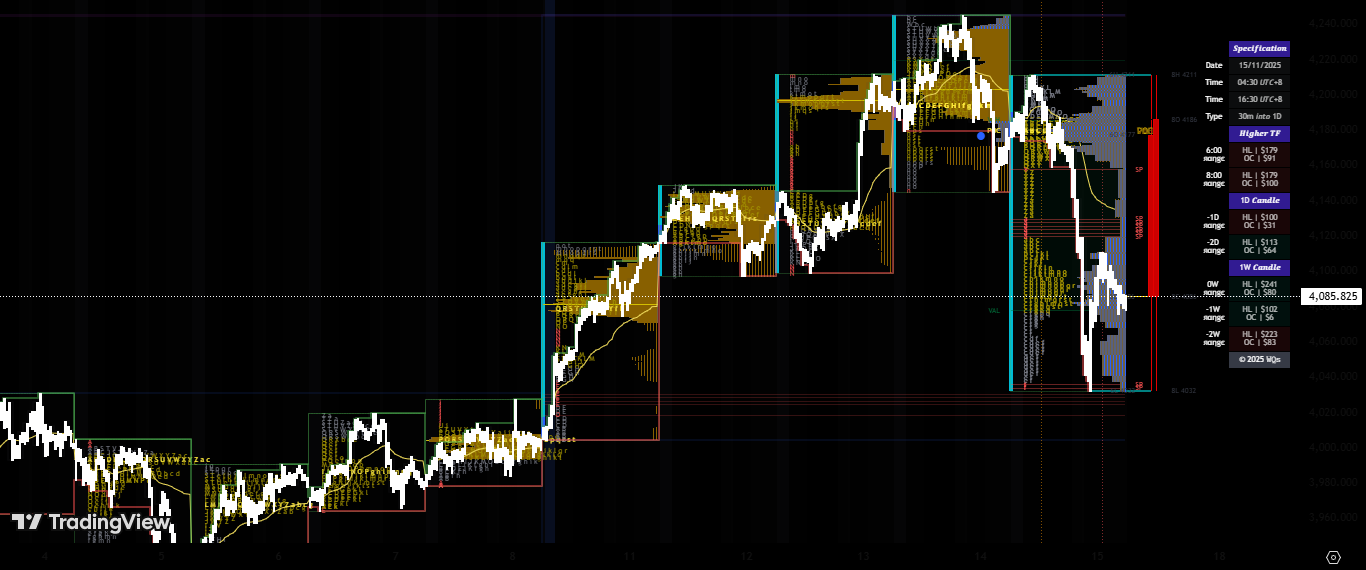